In [1]:
import pandas as pd
datafile = 'D:\\ProblemCData.xlsx'
dataset = pd.read_excel(datafile)

In [24]:
E_AZ = dataset[(dataset['MSN'] == 'GDPRX') & (dataset['StateCode'] == 'AZ')]
E_CA = dataset[(dataset['MSN'] == 'GDPRX') & (dataset['StateCode'] == 'CA')]
E_NM = dataset[(dataset['MSN'] == 'GDPRX') & (dataset['StateCode'] == 'NM')]
E_TX = dataset[(dataset['MSN'] == 'GDPRX') & (dataset['StateCode'] == 'TX')]

P_AZ = dataset[(dataset['MSN'] == 'TPOPP') & (dataset['StateCode'] == 'AZ')]
P_CA = dataset[(dataset['MSN'] == 'TPOPP') & (dataset['StateCode'] == 'CA')]
P_NM = dataset[(dataset['MSN'] == 'TPOPP') & (dataset['StateCode'] == 'NM')]
P_TX = dataset[(dataset['MSN'] == 'TPOPP') & (dataset['StateCode'] == 'TX')]

In [16]:
import numpy as np

t1 = np.array([y for y in range(1977, 2010)])
t2 = np.array([y for y in range(1960, 2010)])

In [143]:
y2 = P_NM['Data'].values

In [144]:
y2_transform = 1 / y2

In [70]:
t1_transform = t1 - t1[0]

In [71]:
t1_transform

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [72]:
t1_transform = t1_transform.reshape(-1, 1)

In [92]:
model1.fit(t1_transform, y1_transform)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
model1.coef_

array([ 0.03483327])

In [94]:
model1.intercept_

12.811883796518941

In [95]:
np.exp(model1.intercept_)

366547.64670787961

In [96]:
t2_transform = t2 - t2[0]

In [97]:
from scipy.optimize import curve_fit

def log_fun(t, L, r):
    
    return L / (1 + np.exp(-r * t))

In [100]:
popt= curve_fit(log_fun, t2_transform, y2)

C:\Program Files\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [103]:
L_test, r_test = popt[0]

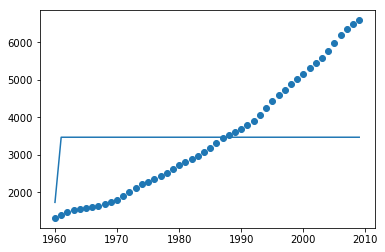

In [104]:
plt.scatter(t2, y2)
plt.plot(t2, log_fun(t2_transform, L_test, r_test))
plt.show()

In [106]:
t2_transform = np.exp(-t2_transform)

In [109]:
t2_transform = t2_transform.reshape(-1, 1)

In [145]:
model2 = LinearRegression()
model2.fit(t2_transform, y2_transform)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
plt.scatter(t2, y2_transform)
plt.plot(t2, model2.predict(t2_transform))

In [147]:
model2.coef_

array([ 0.00042715])

In [148]:
model2.intercept_

0.00072869591355618449

In [115]:
delta_t2 = t2 - t2[0]

In [116]:
delta_t2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

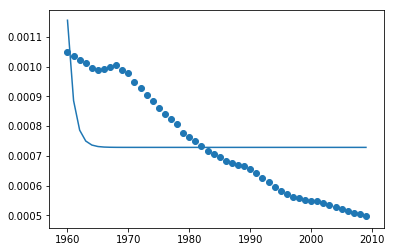

In [146]:
plt.plot(t2, model2.predict(t2_transform))
plt.scatter(t2, y2_transform)
plt.show()

In [154]:
def consumption(t, gamma, a, b, a1, a2, a3, a4, a5, a6):
    p1 = a1 * np.exp(2 * gamma * t) + a3 * np.exp(gamma * t)
    p21 = 1 / (a + b * np.exp(-t))
    p2 = a2 * ((p21) ** 2) +a4 * p21 + a6
    p3 = a5 * np.exp(2 * gamma * t) * p21
    
    return (p1 + p2 + p3) / 100

In [162]:
a = 0.000728696
b = 0.00042715
gamma = 0.03869189
beta = 22370.54393
a1 = (beta ** 2) * (-0.0000223399827)
a3 = -3.3147724 * beta
a2 = -0.0644175993
a4 = 9.95E+02
a5 = 0.00209279376 * beta
a6 = -799892.612
t = 2050 - 1960

consumption(t, gamma, a, b, a1, a2, a3, a4, a5, a6)

542001.32907738094

In [13]:
# 总能源消耗
TEC_AZ = dataset[(dataset['MSN'] == 'TETCB') & (dataset['StateCode'] == 'AZ')]
TEC_CA = dataset[(dataset['MSN'] == 'TETCB') & (dataset['StateCode'] == 'CA')]
TEC_NM = dataset[(dataset['MSN'] == 'TETCB') & (dataset['StateCode'] == 'NM')]
TEC_TX = dataset[(dataset['MSN'] == 'TETCB') & (dataset['StateCode'] == 'TX')]

# 各部门消耗
# 工业
TECI_AZ = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'AZ')]
TECI_CA = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'CA')]
TECI_NM = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'NM')]
TECI_TX = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'TX')]
# 交通
TECT_AZ = dataset[(dataset['MSN'] == 'TNACB') & (dataset['StateCode'] == 'AZ')]
TECT_CA = dataset[(dataset['MSN'] == 'TNACB') & (dataset['StateCode'] == 'CA')]
TECT_NM = dataset[(dataset['MSN'] == 'TNACB') & (dataset['StateCode'] == 'NM')]
TECT_TX = dataset[(dataset['MSN'] == 'TNACB') & (dataset['StateCode'] == 'TX')]
# 商业
TECC_AZ = dataset[(dataset['MSN'] == 'TNCCB') & (dataset['StateCode'] == 'AZ')]
TECC_CA = dataset[(dataset['MSN'] == 'TNCCB') & (dataset['StateCode'] == 'CA')]
TECC_NM = dataset[(dataset['MSN'] == 'TNCCB') & (dataset['StateCode'] == 'NM')]
TECC_TX = dataset[(dataset['MSN'] == 'TNCCB') & (dataset['StateCode'] == 'TX')]
# 电力
TECE_AZ = dataset[(dataset['MSN'] == 'TEEIB') & (dataset['StateCode'] == 'AZ')]
TECE_CA = dataset[(dataset['MSN'] == 'TEEIB') & (dataset['StateCode'] == 'CA')]
TECE_NM = dataset[(dataset['MSN'] == 'TEEIB') & (dataset['StateCode'] == 'NM')]
TECE_TX = dataset[(dataset['MSN'] == 'TEEIB') & (dataset['StateCode'] == 'TX')]
# 住宅
TECR_AZ = dataset[(dataset['MSN'] == 'TNRCB') & (dataset['StateCode'] == 'AZ')]
TECR_CA = dataset[(dataset['MSN'] == 'TNRCB') & (dataset['StateCode'] == 'CA')]
TECR_NM = dataset[(dataset['MSN'] == 'TNRCB') & (dataset['StateCode'] == 'NM')]
TECR_TX = dataset[(dataset['MSN'] == 'TNRCB') & (dataset['StateCode'] == 'TX')]

years = np.array([y for y in range(1960, 2010)])

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

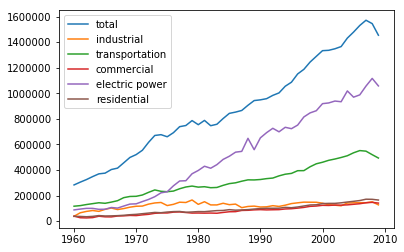

In [14]:
# AZ的情况
TEC_AZ = TEC_AZ['Data'].values
TECI_AZ = TECI_AZ['Data'].values
TECT_AZ = TECT_AZ['Data'].values
TECC_AZ = TECC_AZ['Data'].values
TECE_AZ = TECE_AZ['Data'].values
TECR_AZ = TECR_AZ['Data'].values

# 图像
plt.plot(years, TEC_AZ, label='total')
plt.plot(years, TECI_AZ, label='industrial')
plt.plot(years, TECT_AZ, label='transportation')
plt.plot(years, TECC_AZ, label='commercial')
plt.plot(years, TECE_AZ, label='electric power')
plt.plot(years, TECR_AZ, label='residential')

plt.legend()
plt.savefig('AZ_sector')
plt.show()

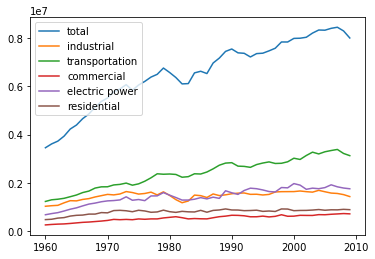

In [15]:
# CA的情况
TEC_CA = TEC_CA['Data'].values
TECI_CA = TECI_CA['Data'].values
TECT_CA = TECT_CA['Data'].values
TECC_CA = TECC_CA['Data'].values
TECE_CA = TECE_CA['Data'].values
TECR_CA = TECR_CA['Data'].values

# 图像
plt.plot(years, TEC_CA, label='total')
plt.plot(years, TECI_CA, label='industrial')
plt.plot(years, TECT_CA, label='transportation')
plt.plot(years, TECC_CA, label='commercial')
plt.plot(years, TECE_CA, label='electric power')
plt.plot(years, TECR_CA, label='residential')

plt.legend()
plt.savefig('CA_sector')
plt.show()

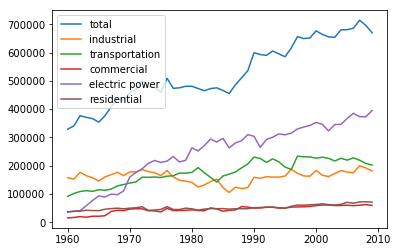

In [16]:
# NM的情况
TEC_NM = TEC_NM['Data'].values
TECI_NM = TECI_NM['Data'].values
TECT_NM = TECT_NM['Data'].values
TECC_NM = TECC_NM['Data'].values
TECE_NM = TECE_NM['Data'].values
TECR_NM = TECR_NM['Data'].values

# 图像
plt.plot(years, TEC_NM, label='total')
plt.plot(years, TECI_NM, label='industrial')
plt.plot(years, TECT_NM, label='transportation')
plt.plot(years, TECC_NM, label='commercial')
plt.plot(years, TECE_NM, label='electric power')
plt.plot(years, TECR_NM, label='residential')

plt.legend()
plt.savefig('NM_sector')
plt.show()

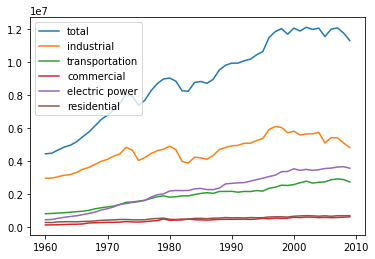

In [17]:
# TX的情况
TEC_TX = TEC_TX['Data'].values
TECI_TX = TECI_TX['Data'].values
TECT_TX = TECT_TX['Data'].values
TECC_TX = TECC_TX['Data'].values
TECE_TX = TECE_TX['Data'].values
TECR_TX = TECR_TX['Data'].values

# 图像
plt.plot(years, TEC_TX, label='total')
plt.plot(years, TECI_TX, label='industrial')
plt.plot(years, TECT_TX, label='transportation')
plt.plot(years, TECC_TX, label='commercial')
plt.plot(years, TECE_TX, label='electric power')
plt.plot(years, TECR_TX, label='residential')

plt.legend()
plt.savefig('TX_sector')
plt.show()

In [18]:
# AZ的增长率
rate_az = (TEC_AZ[-1] - TEC_AZ[0]) / TEC_AZ[0]
rate_az_i = (TECI_AZ[-1] - TECI_AZ[0]) / TECI_AZ[0]
rate_az_t = (TECT_AZ[-1] - TECT_AZ[0]) / TECT_AZ[0]
rate_az_c = (TECC_AZ[-1] - TECC_AZ[0]) / TECC_AZ[0]
rate_az_e = (TECE_AZ[-1] - TECE_AZ[0]) / TECE_AZ[0]
rate_az_r = (TECR_AZ[-1] - TECR_AZ[0]) / TECR_AZ[0]

print(rate_az, rate_az_i, rate_az_t, rate_az_c, rate_az_e, rate_az_r)

4.13658061972 2.35866804621 3.23003753366 2.59280114875 11.0607960448 3.40503478588


In [19]:
# AZ的增长量
delta_az = TEC_AZ[-1] - TEC_AZ[0]
delta_az_i = TECI_AZ[-1] - TECI_AZ[0]
delta_az_t = TECT_AZ[-1] - TECT_AZ[0]
delta_az_c = TECC_AZ[-1] - TECC_AZ[0]
delta_az_e = TECE_AZ[-1] - TECE_AZ[0]
delta_az_r = TECR_AZ[-1] - TECR_AZ[0]

print(delta_az, delta_az_i, delta_az_t, delta_az_c, delta_az_e, delta_az_r)

1171184.7446 89427.42747 376928.4396 101838.78889 969973.33039 127534.28137


In [20]:
# CA的增长率
rate_ca = (TEC_CA[-1] - TEC_CA[0]) / TEC_CA[0]
rate_ca_i = (TECI_CA[-1] - TECI_CA[0]) / TECI_CA[0]
rate_ca_t = (TECT_CA[-1] - TECT_CA[0]) / TECT_CA[0]
rate_ca_c = (TECC_CA[-1] - TECC_CA[0]) / TECC_CA[0]
rate_ca_e = (TECE_CA[-1] - TECE_CA[0]) / TECE_CA[0]
rate_ca_r = (TECR_CA[-1] - TECR_CA[0]) / TECR_CA[0]

print(rate_ca, rate_ca_i, rate_ca_t, rate_ca_c, rate_ca_e, rate_ca_r)

# CA的增长量
delta_ca = TEC_CA[-1] - TEC_CA[0]
delta_ca_i = TECI_CA[-1] - TECI_CA[0]
delta_ca_t = TECT_CA[-1] - TECT_CA[0]
delta_ca_c = TECC_CA[-1] - TECC_CA[0]
delta_ca_e = TECE_CA[-1] - TECE_CA[0]
delta_ca_r = TECR_CA[-1] - TECR_CA[0]

print(delta_ca, delta_ca_i, delta_ca_t, delta_ca_c, delta_ca_e, delta_ca_r)

1.31931298431 0.392847893444 1.5520078655 1.83487534328 1.60300668928 0.877076905947
4553839.876 402351.817 1899547.888 458986.1678 1077466.6622 412383.2065


In [21]:
# NM的增长率
rate_nm = (TEC_NM[-1] - TEC_NM[0]) / TEC_NM[0]
rate_nm_i = (TECI_NM[-1] - TECI_NM[0]) / TECI_NM[0]
rate_nm_t = (TECT_NM[-1] - TECT_NM[0]) / TECT_NM[0]
rate_nm_c = (TECC_NM[-1] - TECC_NM[0]) / TECC_NM[0]
rate_nm_e = (TECE_NM[-1] - TECE_NM[0]) / TECE_NM[0]
rate_nm_r = (TECR_NM[-1] - TECR_NM[0]) / TECR_NM[0]

print(rate_nm, rate_nm_i, rate_nm_t, rate_nm_c, rate_nm_e, rate_nm_r)

# NM的增长量
delta_nm = TEC_NM[-1] - TEC_NM[0]
delta_nm_i = TECI_NM[-1] - TECI_NM[0]
delta_nm_t = TECT_NM[-1] - TECT_NM[0]
delta_nm_c = TECC_NM[-1] - TECC_NM[0]
delta_nm_e = TECE_NM[-1] - TECE_NM[0]
delta_nm_r = TECR_NM[-1] - TECR_NM[0]

print(delta_nm, delta_nm_i, delta_nm_t, delta_nm_c, delta_nm_e, delta_nm_r)

1.03663590205 0.150071888525 1.2114660227 2.89822168191 9.67717502889 0.981012064767
341074.2305 23663.3509 110868.88618 44373.36945 358135.42047 35287.20958


In [22]:
# TX的增长率
rate_tx = (TEC_TX[-1] - TEC_TX[0]) / TEC_TX[0]
rate_tx_i = (TECI_TX[-1] - TECI_TX[0]) / TECI_TX[0]
rate_tx_t = (TECT_TX[-1] - TECT_TX[0]) / TECT_TX[0]
rate_tx_c = (TECC_TX[-1] - TECC_TX[0]) / TECC_TX[0]
rate_tx_e = (TECE_TX[-1] - TECE_TX[0]) / TECE_TX[0]
rate_tx_r = (TECR_TX[-1] - TECR_TX[0]) / TECR_TX[0]

print(rate_tx, rate_tx_i, rate_tx_t, rate_tx_c, rate_tx_e, rate_tx_r)

# TX的增长量
delta_tx = TEC_TX[-1] - TEC_TX[0]
delta_tx_i = TECI_TX[-1] - TECI_TX[0]
delta_tx_t = TECT_TX[-1] - TECT_TX[0]
delta_tx_c = TECC_TX[-1] - TECC_TX[0]
delta_tx_e = TECE_TX[-1] - TECE_TX[0]
delta_tx_r = TECR_TX[-1] - TECR_TX[0]

print(delta_tx, delta_tx_i, delta_tx_t, delta_tx_c, delta_tx_e, delta_tx_r)

1.54898955734 0.631158365574 2.41337269384 4.13365970658 7.21043695895 1.53902712593
6865297.262 1859706.634 1925748.4983 490189.3774 3123558.5009 411895.1352


In [23]:
E_AZ

NameError: name 'E_AZ' is not defined

In [25]:
TECI_AZ = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'AZ')]
TECI_CA = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'CA')]
TECI_NM = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'NM')]
TECI_TX = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'TX')]

In [26]:
# TX的情况
TEC_TX = TEC_TX['Data'].values
TECI_TX = TECI_TX['Data'].values
TECT_TX = TECT_TX['Data'].values
TECC_TX = TECC_TX['Data'].values
TECE_TX = TECE_TX['Data'].values
TECR_TX = TECR_TX['Data'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [27]:
TEC_AZ = TEC_AZ['Data'].values
TECI_AZ = TECI_AZ['Data'].values
TECT_AZ = TECT_AZ['Data'].values
TECC_AZ = TECC_AZ['Data'].values
TECE_AZ = TECE_AZ['Data'].values
TECR_AZ = TECR_AZ['Data'].values

plt.plot(years[17:], E_AZ['Data'].values)
plt.plot(years, P_AZ['Data'].values)
plt.plot(years, TECI_AZ)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [28]:
plt.plot(years[17:], E_AZ['Data'].values)
plt.plot(years, P_AZ['Data'].values)
plt.plot(years, TECI_AZ)
plt.show()

ValueError: could not convert string to float: 'TNICB'

In [29]:
# 工业
TECI_NM = dataset[(dataset['MSN'] == 'TNICB') & (dataset['StateCode'] == 'NM')]
# 交通
TECT_CA = dataset[(dataset['MSN'] == 'TNACB') & (dataset['StateCode'] == 'CA')]
# NM的情况
TECI_NM = TECI_NM['Data'].values
TECT_NM = TECT_NM['Data'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [35]:
years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009])

In [36]:
E_NM = E_NM['Data'].values

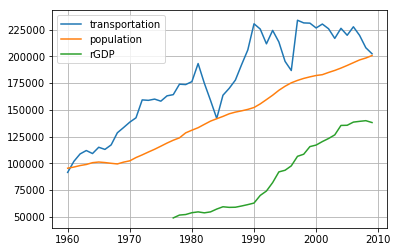

In [47]:
plt.plot(years, TECT_NM, label='transportation')
plt.plot(years, P_NM * 100, label='population')
plt.plot(years[17:], E_NM * 2, label='rGDP')

plt.legend()
plt.grid()
plt.savefig('2')
plt.show()